In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

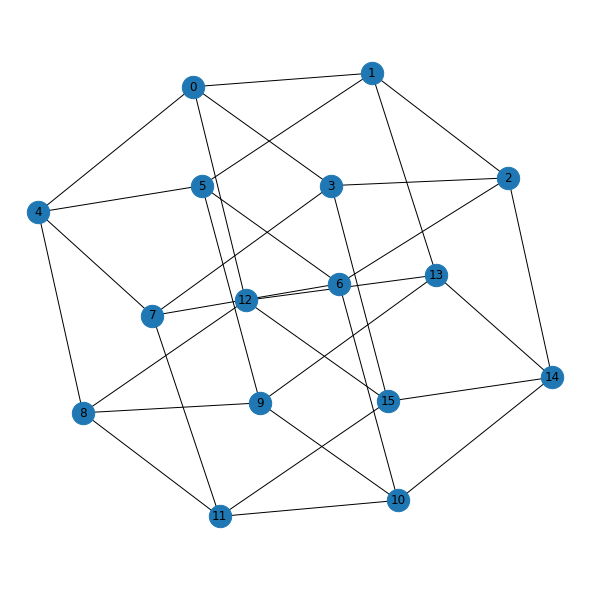

In [20]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)
J_interaction = graph_gen.reorder_graph(J_interaction, root = 0)
#H = np.random.random(N)
H=np.zeros(N)
betas_fast = np.arange(0.1,2,1e-1)

j = graph_gen.spin_glass()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [24]:
imp.reload(solvers)
import model
imp.reload(model)
model_2d_h0_spinglass = model.model(N, H, J, J_interaction)
res_ex_2d_h0_spinglass = solvers.exact_sol(model_2d_h0_spinglass, betas_fast)

beta: 0.1, Fe: -7.045 Energy: -0.228 M: 0.0 S: 0.682 -1.13e+02
beta: 0.2, Fe: -3.694 Energy: -0.456 M: 0.0 S: 0.648 -59.1
beta: 0.3, Fe: -2.652 Energy: -0.681 M: 0.0 S: 0.591 -42.4
beta: 0.4, Fe: -2.187 Energy: -0.902 M: 2.28e-17 S: 0.5144
beta: 0.5, Fe: -1.951 Energy: -1.11 M: 1.69e-16 S: 0.421.2
beta: 0.6, Fe: -1.826 Energy: -1.29 M: 6.04e-16 S: 0.322.2
beta: 0.7, Fe: -1.760 Energy: -1.42 M: 9.9e-16 S: 0.2358.2
beta: 0.8, Fe: -1.724 Energy: -1.51 M: 1.67e-15 S: 0.177.6
beta: 0.9, Fe: -1.703 Energy: -1.56 M: 1.99e-15 S: 0.12636
beta: 1.0, Fe: -1.691 Energy: -1.59 M: 8.62e-16 S: 0.09691
beta: 1.1, Fe: -1.683 Energy: -1.61 M: 1.08e-15 S: 0.07859
beta: 1.2, Fe: -1.678 Energy: -1.62 M: 7e-16 S: 0.066726.8
beta: 1.3, Fe: -1.674 Energy: -1.63 M: 1.13e-15 S: 0.059.8
beta: 1.4, Fe: -1.671 Energy: -1.63 M: 4.32e-16 S: 0.054.7
beta: 1.5, Fe: -1.668 Energy: -1.63 M: 3.47e-16 S: 0.05067
beta: 1.6, Fe: -1.666 Energy: -1.64 M: 2.97e-16 S: 0.04837
beta: 1.7, Fe: -1.664 Energy: -1.64 M: 3.24e-16 S: 0

In [25]:
imp.reload(solvers)
import solvers

res_nn_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=10000)
res_nn_2d_h0_spinglass["name"]="nn"

fe: -7.045 std_fe: 2.88E-02 M: 0.008 S: 0.681 E: -0.232: 0.0108, B1 = -0.0000
fe: -3.687 std_fe: 5.52E-02 M: 0.008 S: 0.650 E: -0.437: 0.00859, B1 = -0.001
fe: -2.638 std_fe: 7.85E-02 M: 0.011 S: 0.601 E: -0.635: 0.0093, B1 = -0.0021
fe: -2.157 std_fe: 9.64E-02 M: 0.008 S: 0.541 E: -0.804: 0.00783, B1 = 0.0010
fe: -1.909 std_fe: 1.03E-01 M: 0.008 S: 0.440 E: -1.028: 0.0106, B1 = -0.0089
fe: -1.787 std_fe: 6.72E-02 M: 0.011 S: 0.274 E: -1.330: 0.00875, B1 = 0.0001
fe: -1.735 std_fe: 3.69E-02 M: 0.012 S: 0.167 E: -1.496: 0.00306, B1 = 0.0020
fe: -1.710 std_fe: 1.61E-02 M: 0.006 S: 0.112 E: -1.570: 0.00492, B1 = 0.0031
fe: -1.696 std_fe: 6.36E-03 M: 0.002 S: 0.087 E: -1.599: 0.00154, B1 = 0.00101
fe: -1.687 std_fe: 2.17E-03 M: 0.006 S: 0.073 E: -1.614: 0.00665, B1 = -0.0022
fe: -1.681 std_fe: 2.53E-03 M: 0.002 S: 0.063 E: -1.624: 0.00477, B1 = 0.00100
fe: -1.676 std_fe: 2.99E-04 M: 0.013 S: 0.056 E: -1.630: 0.00915, B1 = -0.0002
fe: -1.673 std_fe: 5.60E-04 M: 0.007 S: 0.052 E: -1.633 0.00

In [26]:
res_nn_is = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=1000,
                           batch_size=1000,
                           bias = True, z2 = False, x_hat_clip = False, 
                           i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.045 std_fe: 3.26E-05 M: -0.030 S: 0.682 E: -0.229 0.0232, B1 = 0.003
fe: -3.694 std_fe: 6.50E-05 M: -0.012 S: 0.647 E: -0.458 0.0294, B1 = -0.001
fe: -2.653 std_fe: 1.02E-04 M: -0.054 S: 0.591 E: -0.683 0.0269, B1 = -0.024
fe: -2.187 std_fe: 1.47E-04 M: -0.006 S: 0.516 E: -0.898 0.0245, B1 = 0.0078
fe: -1.952 std_fe: 2.91E-04 M: -0.066 S: 0.420 E: -1.112 0.0261, B1 = 0.016
fe: -1.864 std_fe: 4.46E-03 M: -0.060 S: 0.332 E: -1.312 0.0212, B1 = -0.006
fe: -1.755 std_fe: 7.19E-04 M: 0.150 S: 0.233 E: -1.422: 0.0168, B1 = -0.003
fe: -1.718 std_fe: 5.21E-04 M: 0.051 S: 0.146 E: -1.535: 0.0426, B1 = -0.021
fe: -1.698 std_fe: 5.10E-04 M: 0.051 S: 0.096 E: -1.591: 0.028, B1 = 0.00235
fe: -1.689 std_fe: 5.82E-04 M: 0.137 S: 0.082 E: -1.607: 0.017, B1 = 0.00011
fe: -1.681 std_fe: 6.67E-06 M: -0.002 S: 0.063 E: -1.624 0.0364, B1 = 0.0041
fe: -1.676 std_fe: 8.91E-07 M: -0.004 S: 0.056 E: -1.6290.00975, B1 = -0.001
fe: -1.673 std_fe: 3.21E-06 M: -0.004 S: 0.052 E: -1.6330.064, B1 = -0.000001


In [27]:
res_nn_z2_2d_h0_spinglass = solvers.nn_sol(model_2d_h0_spinglass, betas_fast, max_step=2000,
                           bias = True, z2 = True, x_hat_clip = False, batch_size=1000)
res_nn_z2_2d_h0_spinglass["name"]="nn_z2"

fe: -7.045 std_fe: 2.22E-02 M: 0.007 S: 0.682 E: -0.228: 0.0216, B1 = 0.020
fe: -3.691 std_fe: 3.72E-02 M: 0.009 S: 0.649 E: -0.445: 0.0278, B1 = -0.0527
fe: -2.646 std_fe: 4.82E-02 M: 0.008 S: 0.594 E: -0.665: 0.021, B1 = 0.03991
fe: -2.180 std_fe: 5.02E-02 M: 0.007 S: 0.516 E: -0.890: 0.0211, B1 = 0.236
fe: -1.941 std_fe: 4.85E-02 M: 0.010 S: 0.422 E: -1.097: 0.0169, B1 = 0.5914
fe: -1.819 std_fe: 3.96E-02 M: 0.009 S: 0.311 E: -1.301: 0.0151, B1 = 1.0998
fe: -1.753 std_fe: 3.03E-02 M: 0.004 S: 0.222 E: -1.437: 0.0152, B1 = 1.6890
fe: -1.720 std_fe: 2.45E-02 M: 0.007 S: 0.160 E: -1.519: 0.0244, B1 = 2.3627
fe: -1.701 std_fe: 1.30E-02 M: 0.002 S: 0.113 E: -1.575: 0.029, B1 = 3.05886
fe: -1.690 std_fe: 9.21E-03 M: 0.006 S: 0.088 E: -1.601: 0.0375, B1 = 3.5127
fe: -1.683 std_fe: 4.63E-03 M: 0.017 S: 0.074 E: -1.615: 0.0197, B1 = 3.9791
fe: -1.677 std_fe: 1.64E-03 M: 0.002 S: 0.063 E: -1.625: 0.0301, B1 = 4.4499
fe: -1.674 std_fe: 2.94E-03 M: 0.011 S: 0.057 E: -1.629 0.04, B1 = 4.868686
f

In [28]:
imp.reload(solvers)
res_bp_2d_h0_spinglass = solvers.bp_sol(model_2d_h0_spinglass, betas_fast)
res_bp_2d_h0_spinglass["name"]="bp"

fe: -7.045, ener: -0.226, M: 0.000, iter 7
fe: -3.690, ener: -0.443, M: 0.000, iter 9
fe: -2.642, ener: -0.644, M: 0.000, iter 12
fe: -2.165, ener: -0.824, M: 0.000, iter 19
fe: -1.913, ener: -0.980, M: 0.000, iter 28
fe: -1.769, ener: -1.114, M: 0.000, iter 86
fe: -1.693, ener: -1.402, M: 0.807, iter 66
fe: -1.666, ener: -1.522, M: 0.921, iter 20
fe: -1.653, ener: -1.575, M: 0.960, iter 14
fe: -1.647, ener: -1.601, M: 0.977, iter 11
fe: -1.643, ener: -1.616, M: 0.986, iter 10
fe: -1.641, ener: -1.624, M: 0.992, iter 8
fe: -1.640, ener: -1.630, M: 0.995, iter 7
fe: -1.640, ener: -1.633, M: 0.997, iter 7
fe: -1.639, ener: -1.635, M: 0.998, iter 7
fe: -1.639, ener: -1.636, M: 0.999, iter 7
fe: -1.639, ener: -1.637, M: 0.999, iter 6
fe: -1.639, ener: -1.637, M: 0.999, iter 6
fe: -1.639, ener: -1.638, M: 1.000, iter 6


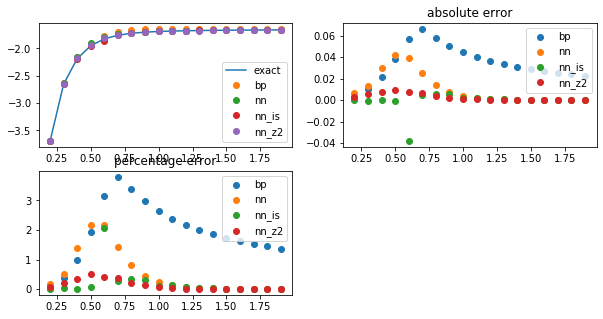

In [29]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,
                            res_nn_is,
                            res_nn_z2_2d_h0_spinglass],
                           init_=1)
#plt.ylim(-0.1,0.11)
plt.show()

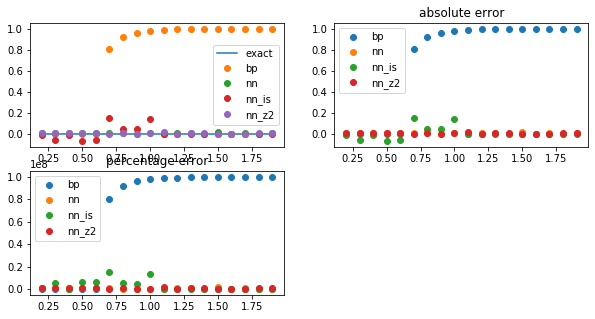

In [30]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, 
                           res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,
                            res_nn_is,
                            res_nn_z2_2d_h0_spinglass],
                          init_=1)
plt.show()

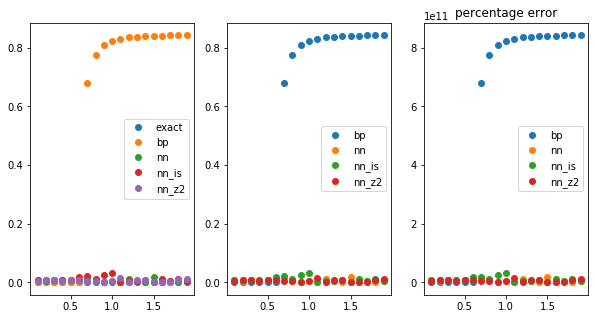

In [31]:
%matplotlib inline
imp.reload(solvers)
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_2d_h0_spinglass, 
                           [res_bp_2d_h0_spinglass, 
                            res_nn_2d_h0_spinglass,
                            res_nn_is,
                            res_nn_z2_2d_h0_spinglass],
                              )
plt.show()

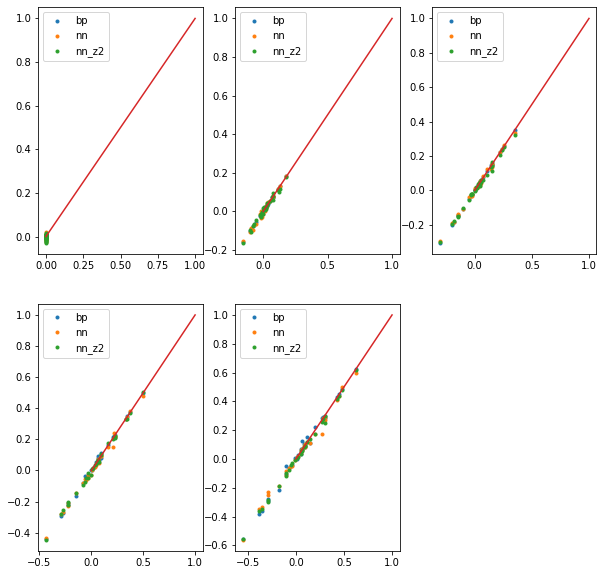

In [18]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[5:10], res_ex_2d_h0_spinglass, [res_bp_2d_h0_spinglass, res_nn_2d_h0_spinglass, res_nn_z2_2d_h0_spinglass], J_interaction)
plt.show()